## Sentiments among local communities - A case study of LOU Area

**Meng Chen**                          
Centre for Research and Education on Biological Evolution and Environment          
School of Earth Sciences and Engineering                                                         
Nanjing University, Nanjing, China, 210093                                                          

### **1. Introduction**
Sentiment plays an important role in modern society as the success of the social media development around the globe. Any people can share their feelings with friends or any people thousands of miles away. In turn, their friends can show their sympathy from the other side of the world without physical presence. Virtually, we are all connected now. People share feeling, reviews, opinions around the world. The embedded sentiments have been widely assessed by researchers in politics, commercials, governments, and etc, in order to conduct polling, to improve their products or service, to implement new policies, and etc. School redistricting is a unique process that has longitudinal impacts on every family in the United States; good school district increases the property price and provide better education for the kids in the district. Each year, numerous redistricting projects have been carried out across the country and have been stirred outcries of local communities based on a variety of reasons. To understand the needs of the local communities, I conducted the sentiment analyses on local communities based on the feedbacks on the proposed new school districts in Linganore-Oakdale-Urbana (LOU) area.

LOU area is located in the southeastern area of the Frederick County of Maryland. During last ten years, the local communities have been transformed into popular suburban residency for people who work in the Washington-Maryland area. Many professionals, such as federal government employees or military personals chose to live in these neighborhoods, despite the distant transportation between their working places and homes. Even some government facilities have been established in this area. For an example, the Social Security Data Center is located next to the Park and Ride of the Exit 26 of Interstate-270 in the Urbana area. Recently, [Kite Pharma](https://www.kitepharma.com) is starting to build a pharmaceutical manufacturing facility here, and along its side, a hotel and associated restaurants will be built in two years. Urbana area has become the prime location for both business and residents.

These ongoing commercial developments bring prosperity to the local communities. So does anxiety. For an example, the workforce brought by Kite Pharma has been estimated about 200-300 employees initially to 700-900 by its capacity. Such huge workforce will need hundreds of homes to accommodate their housing needs in nearby communities. Thus, the estate projects have been steadfastly developed in this area. More and more housing projects start to show themselves off the landscape. In contrast, only two new elementary schools have been added to the entire area, which could not alleviate overcrowd situations in local communities. It becomes clear that, lacking of additional government funding, the Board of Education of Frederick County has an urgent need to conduct school redistricting on the basis of changing feeder patterns.

Starting in January, 2019, Frederick County has contracted with Cropper GIS Consulting to conduct the redistricting study and expected the study would be completed by the end of the 2019. This study primarily focuses on the attendance boundary and feeder patterns of local communities as two new schools have been added to the school district. Supposedly, this project can fully address the enrollment growth in LOU area and provide projections of the school enrollments in next five-eight years. Based on the message of the Board of Education, the redistricting roots in their core belief that all students are entitled equally to respect, opportunity, and excellence ([here for details](https://www.fcps.org/capital-program/linganore-oakdale-urbana-area-redistricting-study)). However, after the Public Engagement Session in March, 2019, the proposed attendance boundary stirred the outrage from local communities based on analyses of the parents' feedbacks provided by the Cropper GIS. Most of parents were extremely frustrated by the proposed new attendance boundaries. Some parents in Urbana area for example organized a local hearing to express their frustration to one of the Board of Education members. In attempt to alleviate the outrage raised from local communities, two entirely new options have been proposed in the Public Engagement Session in June, 2019 to replace the old ones. It is not clear that if those new options satisfying the needs of the local communities despite some positive sign in the parents' feedbacks.

This project is the quantitative assessment of the parents' feedbacks prior to the superintendent's recommendation in the October. It primarily focuses on the sentiment and preferences of parents for new proposed options after the Public Engagement Session in June, 2019. The parents' preferable options will be compared with the plan of the superintendent's recommendation to investigate whether Board of Education's choices are aligned with parents' preferences and seek potential explanation. These will provide the board members the basic understanding of parents preferences quantitatively and help them identify which communities have been mostly affected after June's proposal. In addition, the results will help parents recognize the educational needs of the majority of the their local communities.

It should be noted that this project will apply Natural Language Processing (NLP) techniques and can be broadly implemented in other similar projects.

In [1]:
from redistrict import *

#### Set up parameters

In [2]:
sch_names_old = ['Centerville ES', 'Deer Crossing ES', 'Green Valley ES', 
                 'Kemptown ES','Liberty ES', 'New Market ES', 
                 'Oakdale ES', 'Spring Ridge ES', 'Twin Ridge ES', 
                 'Urbana ES', 'Gov. T.J. MS', 'New Market MS', 
                 'Oakdale MS', 'Urbana MS', 'Windsor Knolls MS',
                 'Linganore HS', 'Oakdale HS', 'Urbana HS']
columns = ['Live-in School', 'Comments']

#### Read the tables of pdf file

In [3]:
file = 'data/comments/LOU_SurveyResultsJune.pdf'
#tables_es_a = camelot.read_pdf(file, pages='4-26')

#### Load the data and perform the cleaning up

In [31]:
df_es_a = get_pdf_data(file, '4-26', columns, sch_names_old)
df_es_b = get_pdf_data(file, '27-47', columns, sch_names_old)
df_es_ab = get_pdf_data(file, '48-96', columns, sch_names_old)
df_ms_a = get_pdf_data(file, '97-109', columns, sch_names_old)
df_ms_b = get_pdf_data(file, '110-122', columns, sch_names_old)
df_ms_ab = get_pdf_data(file, '123-144', columns, sch_names_old)
df_hs_a = get_pdf_data(file, '145-160', columns, sch_names_old)
df_hs_b = get_pdf_data(file, '161-176', columns, sch_names_old)
df_hs_ab = get_pdf_data(file, '177-213', columns, sch_names_old)

#### Visualize the data in Word Cloud

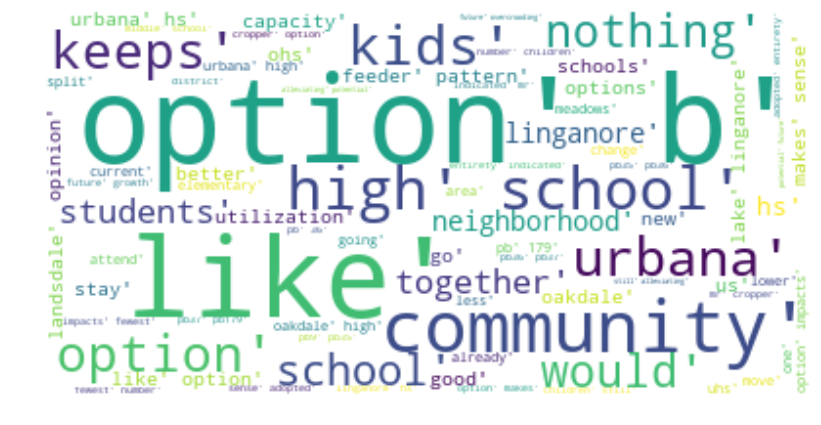

In [32]:
plot_words(df_hs_b)

#### Sentiment Analyses using `nltk.sentiment.vader`

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

def senti_proportion(df):
    SentiAnalyzer = SentimentIntensityAnalyzer()
    schools = []
    scores = []
    num_senti = {}
    for _, comment in df.iterrows():
        schools.append(comment[0])
        score = SentiAnalyzer.polarity_scores(str(comment[1]))
        scores.append(score['compound'])
    
    df_scores = pd.DataFrame([schools, scores]).T
    df_scores.columns = ['School', 'Score']
    for school in df_scores['School'].unique():
        school_score = df_scores[df_scores['School'] == school]['Score'].astype(float)
        score_mean = np.mean(school_score)
        #num_scores = len(school_score)
        # positive sentiment
        num_senti_pos = len(school_score[school_score >= 0.05])
        #senti_pos_prop = num_senti_pos/num_scores
        # negative sentiment
        num_senti_neg = len(school_score[school_score <= -0.05])
        #senti_neg_prop = num_senti_neg/num_scores
        # neutural sentiment
        num_senti_neu = len(school_score[school_score <= 0.05][school_score >= -0.05])
        #senti_neu_prop = num_senti_neu/num_scores
        num_senti.update({school:[num_senti_pos, num_senti_neg, num_senti_neu, round(score_mean, 3)]})
        
    return num_senti

In [34]:
scores_es_a = senti_proportion(df_es_a)
scores_es_b = senti_proportion(df_es_b)
scores_ms_a = senti_proportion(df_ms_a)
scores_ms_b = senti_proportion(df_ms_b)
scores_hs_a = senti_proportion(df_hs_a)
scores_hs_b = senti_proportion(df_hs_b)

In [42]:
scores_es_a

{'Green Valley ES': [13, 10, 19, 0.019],
 'Spring Ridge ES': [3, 1, 3, 0.162],
 'Centerville ES': [49, 25, 78, 0.104],
 'Oakdale ES': [8, 5, 29, 0.033],
 'Deer Crossing ES': [47, 14, 93, 0.102],
 'Kemptown ES': [23, 30, 47, -0.028],
 'New Market ES': [11, 13, 10, 0.008],
 'Urbana ES': [9, 3, 24, 0.1],
 'Twin Ridge ES': [2, 2, 10, -0.013],
 'Liberty ES': [0, 0, 1, 0.0]}

In [71]:
import vincent
import matplotlib.pyplot as plt

scores = senti_proportion(df_table)
scores_GV = scores['Green Valley ES']
dict_scores = {'positive':scores_GV[0], 'negative':scores_GV[1], 'neutral':scores_GV[2]}
donut = vincent.Pie(dict_scores)

In [42]:
dict_scores

{'positive': 13, 'negative': 10, 'neutral': 19}

In [138]:
feature = c['Score']
feature = np.asarray(feature)

In [110]:
codes_sch = {}

for school in enumerate(c['School'].unique()):
    codes_sch.update({school[1]:school[0]})

In [117]:
len(codes_sch)

10

In [127]:
code_list = []

for name in c['School']:
    code_list.append(codes_sch[name])


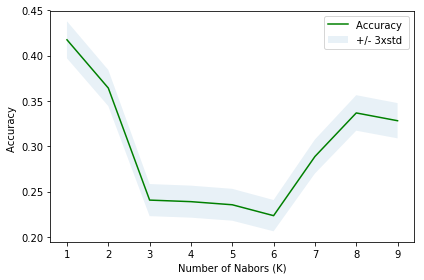

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

Ks= len(codes_sch)

mean_acc =np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
CoufusionMx = [];

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(feature.reshape(-1,1), code_list)
    yhat = neigh.predict(feature.reshape(-1,1))
    mean_acc[n-1] = metrics.accuracy_score(code_list, yhat)
    
    std_acc[n-1] = np.std(yhat == code_list)/np.sqrt(yhat.shape[0])

# plot the mean acc by different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [79]:
data_T = pd.DataFrame(data).T

In [81]:
np.asarray(data_T)

array([[0.2023, -0.5942, 0.0, ..., nan, nan, nan],
       [0.5859, 0.0, 0.0, ..., nan, nan, nan],
       [0.0, 0.6164, 0.0, ..., -0.2755, nan, nan],
       ...,
       [0.0, 0.4767, 0.0, ..., nan, nan, nan],
       [0.0, -0.296, -0.5267, ..., nan, nan, nan],
       [0.0, nan, nan, ..., nan, nan, nan]], dtype=object)

In [68]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.
    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in xrange(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


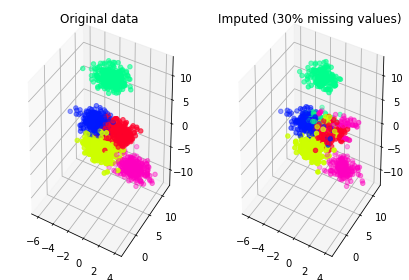

In [73]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def make_fake_data(fraction_missing, n_clusters=5, n_samples=1500,
                   n_features=3, seed=None):
    # complete data
    gen = np.random.RandomState(seed)
    X, true_labels = make_blobs(n_samples, n_features, n_clusters,
                                random_state=gen)
    # with missing values
    missing = gen.rand(*X.shape) < fraction_missing
    Xm = np.where(missing, np.nan, X)
    return X, true_labels, Xm


X, true_labels, Xm = make_fake_data(fraction_missing=0.3, n_clusters=5, seed=0)
labels, centroids, X_hat = kmeans_missing(Xm, n_clusters=5)

# plot the inferred points, color-coded according to the true cluster labels
fig, ax = plt.subplots(1, 2, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax[0].scatter3D(X[:, 0], X[:, 1], X[:, 2], c=true_labels, cmap='gist_rainbow')
ax[1].scatter3D(X_hat[:, 0], X_hat[:, 1], X_hat[:, 2], c=true_labels,
                cmap='gist_rainbow')
ax[0].set_title('Original data')
ax[1].set_title('Imputed (30% missing values)')
fig.tight_layout()

In [82]:
true_labels

array([1, 3, 3, ..., 2, 2, 4])

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Use

(-5, 100)

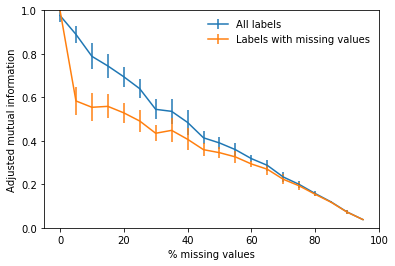

In [67]:
from sklearn.metrics import adjusted_mutual_info_score

fraction = np.arange(0.0, 1.0, 0.05)
n_repeat = 10
scores = np.empty((2, fraction.shape[0], n_repeat))
for i, frac in enumerate(fraction):
    for j in range(n_repeat):
        X, true_labels, Xm = make_fake_data(fraction_missing=frac, n_clusters=5)
        labels, centroids, X_hat = kmeans_missing(Xm, n_clusters=5)
        any_missing = np.any(~np.isfinite(Xm), 1)
        scores[0, i, j] = adjusted_mutual_info_score(labels, true_labels)
        scores[1, i, j] = adjusted_mutual_info_score(labels[any_missing],
                                                     true_labels[any_missing])

fig, ax = plt.subplots(1, 1)
scores_all, scores_missing = scores
ax.errorbar(fraction * 100, scores_all.mean(-1),
            yerr=scores_all.std(-1), label='All labels')
ax.errorbar(fraction * 100, scores_missing.mean(-1),
            yerr=scores_missing.std(-1),
            label='Labels with missing values')
ax.set_xlabel('% missing values')
ax.set_ylabel('Adjusted mutual information')
ax.legend(loc='best', frameon=False)
ax.set_ylim(0, 1)
ax.set_xlim(-5, 100)